# Uploading the Kaggle API Token
In this cell, you will upload your Kaggle API token to authenticate and access the Kaggle dataset.
The `kaggle.json` file, which contains your API credentials, should be downloaded from your Kaggle account.
To download it, go to your Kaggle account settings, scroll to the API section, and click 'Create New API Token'.
Once you have your `kaggle.json` file, click the 'Browse' button below to upload it to this notebook environment.

In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

# Setting Up Kaggle API Credentials
After uploading your `kaggle.json` file, this cell will run commands to set up the environment
variables so that the Kaggle API can use these credentials. This includes making a `.kaggle`
directory at the root, copying the `kaggle.json` file into this directory, and setting the
appropriate permissions for the file.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the Wildfire Dataset
This cell will handle the downloading of the LAST version of the wildfire dataset from Kaggle.
Once executed, the dataset will be downloaded
and saved to the current working directory in Colab.

In [ ]:
!kaggle datasets download -d elmadafri/the-wildfire-dataset

100% 9.94G/9.94G [04:15<00:00, 44.8MB/s]
100% 9.94G/9.94G [04:15<00:00, 41.8MB/s]


# Unzipping the Dataset
After downloading the dataset, this cell will unzip the dataset. The dataset comes in a
compressed `.zip` file format to save space. Running the command below will extract the
files into a directory that you can then work with in the notebook.

In [ ]:
!unzip the-wildfire-dataset.zip

Archive:  the-wildfire-dataset.zip
  inflating: the_wildfire_dataset_2n_version/test/fire/19196558588_267f24b847_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/20960888741_8c4be2c1df_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/26131736898_9e6a8cd68f_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/26549039025_b4cce14ec7_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27002088114_aa5cc7f353_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27335331950_39b376eddd_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27389369514_cd30397ac2_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27951228213_2dd961ac1f_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27968020506_5f1a59f2a5_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/28020330864_d7a2429a7e_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/28347651877_ce21ed134e_o.png  
  inflating: the_wi

In [ ]:
!unzip alik_changed2.zip -d ds1

Archive:  alik_changed2.zip
   creating: ds1/Forest Fire Dataset/Testing/
   creating: ds1/Forest Fire Dataset/Testing/fire/
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0002.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0015.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0027.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0038.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0040.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0048.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0063.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0072.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0084.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0091.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0097.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0107.jpg  
  inflating: ds1/Forest Fire Dataset/Testing/fire/fire_0124.jpg  
  inflating: ds1/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/forest_fire_changed2.zip' -d ds2

Archive:  /content/drive/MyDrive/forest_fire_changed2.zip
   creating: ds2/forest_fire/Testing/
   creating: ds2/forest_fire/Testing/fire/
  inflating: ds2/forest_fire/Testing/fire/abc169.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc170.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc171.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc172.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc173.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc174.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc175.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc176.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc177.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc178.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc179.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc180.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc181.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc182.jpg  
  inflating: ds2/forest_fire/Testing/fire/abc183.jpg  
  inflating: ds2/forest_fire/Testing

## Setting Up Data Loaders

Before we can start training our model, we need to load our image data into a format that's usable by TensorFlow. This is done by using the `tf.keras.utils.image_dataset_from_directory` function, which conveniently handles images stored in a directory structure.

Here's what we are setting up in this cell:

1. **Directory Paths**: We define the base directory where our dataset is located. Within this base directory, we should have three subdirectories corresponding to our training, validation, and test sets, respectively.

2. **Image Loading Parameters**: We set the batch size and image size. The batch size is the number of images that the model will process at one time during training, and the image size is the dimensions to which all images will be resized.

3. **Data Loaders**: We create data loaders for the training, validation, and test datasets. These loaders will read the images from disk, apply the specified preprocessing, and arrange them into batches.

Note: The `label_mode` is set to 'binary' which indicates that our problem is a binary classification task. If you have more than two classes, change this parameter to 'categorical'.

The `shuffle` parameter is set to `True` for the training dataset to ensure that the model does not learn anything from the order of the images. It's not necessary to shuffle the validation and test sets, but doing so does not harm and ensures that any evaluation of the model is done on a random sample of the data.

After running this cell, `train_dataset`, `val_dataset`, and `test_dataset` will be ready for use in the model training and evaluation steps.

We found two additional datasets other than we initially had, to improve the performance of our model. We also found 20 additional wildfire photos which were significantly harder for models the predict, and added those photos as well.

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the directory paths for the training, validation, and test sets
base_dir = '/content/the_wildfire_dataset_2n_version'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Load the datasets using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

class_names = train_dataset.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
train_dataset = train_dataset.map(remap_labels)
val_dataset = val_dataset.map(remap_labels)
test_dataset = test_dataset.map(remap_labels)

Found 1887 files belonging to 2 classes.
Found 402 files belonging to 2 classes.
Found 410 files belonging to 2 classes.


In [ ]:
# DS1

base_dir_ds1 = '/content/ds1/Forest Fire Dataset'
train_dir_ds1 = os.path.join(base_dir_ds1, 'Training')
val_dir_ds1 = os.path.join(base_dir_ds1, 'Validation')
test_dir_ds1 = os.path.join(base_dir_ds1, 'Testing')

# Load the datasets using image_dataset_from_directory
train_dataset_1 = tf.keras.utils.image_dataset_from_directory(
    train_dir_ds1,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)

val_dataset_1 = tf.keras.utils.image_dataset_from_directory(
    val_dir_ds1,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

test_dataset_1 = tf.keras.utils.image_dataset_from_directory(
    test_dir_ds1,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

class_names = train_dataset_1.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
train_dataset_1 = train_dataset_1.map(remap_labels)
val_dataset_1 = val_dataset_1.map(remap_labels)
test_dataset_1 = test_dataset_1.map(remap_labels)

Found 1216 files belonging to 2 classes.
Found 304 files belonging to 2 classes.
Found 380 files belonging to 2 classes.


In [ ]:
# DS2

base_dir_ds2 = '/content/ds2/forest_fire'
train_dir_ds2 = os.path.join(base_dir_ds2, 'Training')
val_dir_ds2 = os.path.join(base_dir_ds2, 'Validation')
test_dir_ds2 = os.path.join(base_dir_ds2, 'Testing')

# Load the datasets using image_dataset_from_directory
train_dataset_2 = tf.keras.utils.image_dataset_from_directory(
    train_dir_ds2,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)

val_dataset_2 = tf.keras.utils.image_dataset_from_directory(
    val_dir_ds2,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

test_dataset_2 = tf.keras.utils.image_dataset_from_directory(
    test_dir_ds2,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

class_names = train_dataset_2.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
train_dataset_2 = train_dataset_2.map(remap_labels)
val_dataset_2 = val_dataset_2.map(remap_labels)
test_dataset_2 = test_dataset_2.map(remap_labels)

Found 1520 files belonging to 2 classes.
Found 312 files belonging to 2 classes.
Found 68 files belonging to 2 classes.


In [ ]:
# DS3 (HIDDEN IMAGES)

base_dir_ds3 = '/content/new_eval_set/20_representative_images'

# Load the datasets using image_dataset_from_directory
train_dataset_3 = tf.keras.utils.image_dataset_from_directory(
    base_dir_ds3,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)

class_names = train_dataset_3.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
train_dataset_3 = train_dataset_3.map(remap_labels)

Found 20 files belonging to 2 classes.


In [ ]:
# Concatenate the datasets before the optimization
full_train_ds = train_dataset.concatenate(train_dataset_1).concatenate(train_dataset_2).concatenate(train_dataset_3)
full_val_ds = val_dataset.concatenate(val_dataset_1).concatenate(val_dataset_2)
full_test_ds = test_dataset.concatenate(test_dataset_1).concatenate(test_dataset_2)

In [ ]:
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(min(len(image_batch), 9)):  # Display up to 9 images from the batch
        ax = plt.subplot(3, 3, n+1)
        plt.imshow(image_batch[n] / 255.0)  # Make sure the pixel values are in [0,1] range
        if label_batch[n]:
            plt.title("Fire")
        else:
            plt.title("No Fire")
        plt.axis("off")

image_batch, label_batch = next(iter(train_dataset))
show_batch(image_batch, label_batch)


## Optimizing Data Loading

In this cell, we optimize the data loading process for our training, validation, and test datasets. `AUTOTUNE` is a TensorFlow feature that allows the dataset to dynamically adjust the number of images it processes simultaneously, based on the current system conditions.

By calling the `prefetch` method with `buffer_size=AUTOTUNE`, we enable the input pipeline to fetch batches in the background while the model is training. This helps in reducing the time the model has to wait for the data and can improve overall training speed.

Prefetching is a best practice that can significantly improve computational efficiency.

In [ ]:
# Configure the datasets for performance
full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
full_val_ds = full_val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
full_test_ds = full_test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

## Setting Up the Base Model with EfficientNetB0

To leverage the power of transfer learning, we're using a pre-trained model, EfficientNetB0, as the starting point for our own image classification task. Pre-trained on ImageNet, EfficientNetB0 has learned rich feature representations for a wide range of images which can be beneficial for our specific task.
After pre-training and feature extraction, we might want to fine-tune the base model to better suit our specific task. Fine-tuning can lead to significant improvements in accuracy by slightly adjusting the weights of the pre-trained model.


In [ ]:
# Define the model
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True  # Fine-tune the base model

## Fine-Tuning the Model

Fine-tuning is a powerful technique to optimize the pre-trained model for our specific task, allowing us to adjust the higher-order feature representations in the pre-trained model to make them more relevant for the classification of our images.

In [ ]:
# Freeze all the layers before the `fine_tune_at` layer
fine_tune_at = 1
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

## Incorporating a Global Average Pooling Layer

After extracting features using the base model, we often have a high-dimensional feature map for each image. To simplify the model and reduce its complexity, we can apply a Global Average Pooling (GAP) layer. The GAP layer reduces each feature map to a single value by calculating the average of all values in the feature map. This process significantly reduces the dimensionality and prepares the data for the final classification layer. To consolidate the features extracted by the base model into a more manageable form, we introduce a Global Average Pooling 2D (GAP) layer. This layer reduces the dimensions of the feature maps from the base model by calculating the average value for each feature map channel. This step is crucial for reducing the model's complexity and computational load without sacrificing the essential information needed for accurate predictions.


We also tried applying image preprocesing to the input. We tried shrinking/enlarging the image, and adding random distortions such as flips and rotations. The goal was to introduce the model to non-perfect images in order to make it more versatile. In the end, the perturbations did not have a significant increase in model accuracy, therefore we ended up discarding them.

In [ ]:
from tensorflow.keras.layers import BatchNormalization, RandomBrightness
from tensorflow.keras.layers.experimental import preprocessing

inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# x = preprocessing.Rescaling(1./255)(inputs)
# x = preprocessing.RandomFlip("horizontal")(x)
# x = preprocessing.RandomRotation(0.1)(x)
# x = preprocessing.RandomZoom(0.2)(x)
# x = preprocessing.RandomContrast(0.2)(x)
# x = RandomBrightness(0.1)(x)

x = base_model(inputs, training=True)
x = layers.GlobalAveragePooling2D()(x)
# x = BatchNormalization()(x)
# x = Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Use 'sigmoid' for binary classification

## Building the Complete Model

With all the components ready, we now assemble the complete model. This model incorporates preprocessing, the pre-trained base model for feature extraction, pooling to condense the features, and a prediction layer for output. Additionally, we include a Dropout layer to reduce overfitting by randomly setting input units to 0 at a rate of 0.2 during training.

In [ ]:
# Build the model
model = models.Model(inputs, outputs)

## Compiling the Model

With our model architecture defined, the next step is to compile the model. Compiling the model prepares it for training by specifying the loss function, optimizer, and metrics to use for evaluation.


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_initial/10),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Training the Model

Now that our model is compiled, we're ready to start the training process. Training the model involves feeding it our training dataset and letting it learn to predict the correct labels. During training, the model will also be validated using a separate dataset to monitor its performance on data it has not seen before.



In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 288, 288, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 9, 9, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_10 (Dropout)        (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 4050852 (15.45 MB)
Trainable params: 4008829

In [ ]:
checkpoint_path = "/content/drive/My Drive/training_7/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=5*32)

# Train the model with the new callback
model.fit(full_train_ds,
          validation_data=full_val_ds,
          epochs=5,
          callbacks=[cp_callback])  # Pass callback to training


Epoch 1/5
146/146 [==============================] - 171s 778ms/step - loss: 0.2957 - accuracy: 0.8747 - val_loss: 0.5328 - val_accuracy: 0.8477
Epoch 2/5
 13/146 [=>............................] - ETA: 3:46 - loss: 0.8073 - accuracy: 0.6995
Epoch 2: saving model to /content/drive/My Drive/training_7/cp-0002.ckpt
146/146 [==============================] - 146s 898ms/step - loss: 0.2815 - accuracy: 0.8818 - val_loss: 0.4693 - val_accuracy: 0.8517
Epoch 3/5
 27/146 [====>.........................] - ETA: 3:28 - loss: 0.5542 - accuracy: 0.7870
Epoch 3: saving model to /content/drive/My Drive/training_7/cp-0003.ckpt
146/146 [==============================] - 146s 898ms/step - loss: 0.2468 - accuracy: 0.9033 - val_loss: 0.4465 - val_accuracy: 0.8674
Epoch 4/5
 41/146 [=======>......................] - ETA: 3:07 - loss: 0.4524 - accuracy: 0.8155
Epoch 4: saving model to /content/drive/My Drive/training_7/cp-0004.ckpt
146/146 [==============================] - 147s 900ms/step - loss: 0.2297 -

## Saving Your Trained Model to Google Drive

After training your model, it's important to save it so that you can share it with the hackathon organizers and use it for further evaluation. In the following cell, we mount your Google Drive for easy file access and save your trained model directly to it. This ensures that your model is stored securely and can be accessed from anywhere, anytime.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace 'my_model' with your model's name and choose an appropriate path in your Google Drive
model_name = 'final_model.h5'
save_path = f'/content/drive/My Drive/{model_name}'

# Save your model
model.save(save_path)
print(f'Model saved to {save_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/My Drive/final_model.h5


## Evaluating the Trained Model on the test dataset

With your model now trained and saved, the next critical step is to assess its performance on a new set of data. This evaluation will provide you with valuable insights into how well your model generalizes to unseen examples, reflecting its potential effectiveness in real-world scenarios. In the following code cell, we will use the .evaluate() method, which will output the model's accuracy and loss on the dataset. It's important to note that this step is crucial for understanding your model's strengths and areas for improvement.

In [ ]:
# Evaluate the model
model.evaluate(full_test_ds)

28/28 [==============================] - 28s 340ms/step - loss: 0.4289 - accuracy: 0.8695


[0.4289291799068451, 0.8694638609886169]

In [ ]:
from keras.models import load_model
model_b4 = load_model('/content/drive/MyDrive/my_model.h5')

In [ ]:
model_b4.evaluate(full_test_ds)

28/28 [==============================] - 34s 338ms/step - loss: 0.5393 - accuracy: 0.8753


[0.5392905473709106, 0.8752913475036621]

In [ ]:
!unzip /content/drive/MyDrive/20_representative_images-20240321T161029Z-001.zip -d new_eval_set

In [ ]:
new_eval_dir = '/content/new_eval_set/20_representative_images'

new_test_dataset = tf.keras.utils.image_dataset_from_directory(
    new_eval_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

class_names = new_test_dataset.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
new_test_dataset = new_test_dataset.map(remap_labels)

Found 20 files belonging to 2 classes.


In [ ]:
# Evaluate old model on hidden test
model_b4.evaluate(new_test_dataset)

1/1 [==============================] - 0s 202ms/step - loss: 1.6189 - accuracy: 0.6500


[1.6189172267913818, 0.6499999761581421]

In [ ]:
# Evaluate new model on hidden test
model.evaluate(new_test_dataset)

1/1 [==============================] - 0s 168ms/step - loss: 0.8893 - accuracy: 0.6000


[0.8893373608589172, 0.6000000238418579]

# Testing hyperparameters

Our model was tested with a range of hyperparameters. The main 3 hyperparameters were the size of the images, the batch size of the model and the learning rate. Our initial image size was 224x224. We experimented by increasing and decreasing it by 32x32. The best performance we achieved was the image size of 288x288. 

The default batch size of 32 yielded the best performance so we ended up not changing it. We increased the learning rate to 0.01, as it gave higher accuracy then the other values we tried. Increasing it further, caused the model to overfit.

In [ ]:
IMG_SIZE = (288, 288)
BATCH_SIZE = 32
learning_rate_initial = 0.01

In [ ]:
model.load_weights('/content/drive/MyDrive/training_1/cp.ckpt')

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 288, 288, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 9, 9, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                           

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'new_test_dataset' is your testing dataset
y_true = []
y_pred = []
for images, labels in new_test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred).squeeze()  # Adjust based on your model output

1/1 [==============================] - 2s 2s/step


### Testing with custom datasets and plotting the confusion matrix

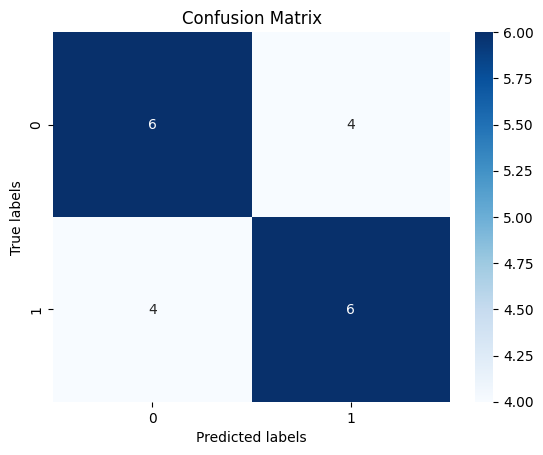

In [ ]:
import seaborn as sns

# Binary classification: convert probabilities to binary predictions
threshold = 0.5  # You can adjust this threshold
y_pred_binary = (y_pred > threshold).astype("int")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)  # Using seaborn for nicer visuals
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()


## Important: Protect Your API Key

Before submitting this notebook, please ensure that you remove your `kaggle.json` file from the notebook environment. To do this, you can simply delete the cell that uploaded the `kaggle.json` file and any cells that may have outputted its contents.

Furthermore, before pushing this notebook to GitHub or any other public repository, ensure that your API key is not visible or stored in the code. Do not share or expose your credentials in any way within this notebook.

**To remove the kaggle.json file from your Colab environment, you can use the following command:**

```python
!rm -rf ~/.kaggle/kaggle.json


Model results:
b4 	    65% on 20 hidden images
b4+datasets 50% on 20 hidden images
b4	    87% on my test set (3 datasets)
b4+datasets 92% on my test set (3 datasets)
